## 1.Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Reading the DataSet

In [9]:
df=pd.read_csv("Pro.csv")
df

,Temperature,Revenue
0,0,50
1,5,70
2,10,90
3,15,110
4,20,130
5,25,160
6,30,190
7,35,220
8,40,250


## 3.Handling Missing Values

In [10]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  9 non-null      int64
 1   Revenue      9 non-null      int64
dtypes: int64(2)
memory usage: 276.0 bytes


## 4. Visualize data

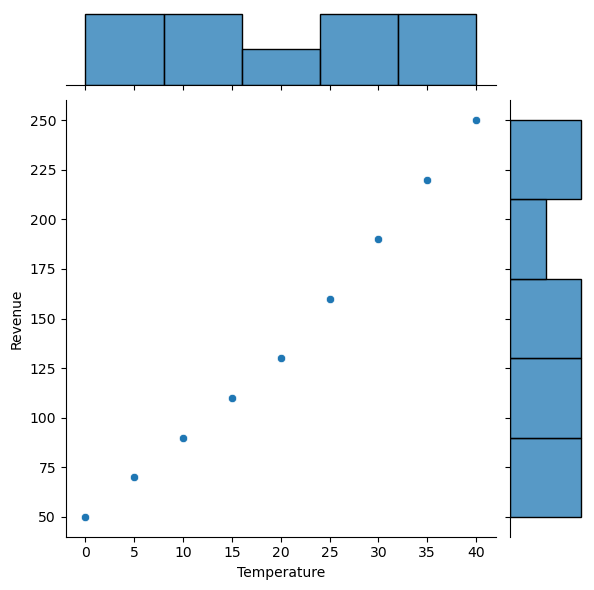

In [12]:
sns.jointplot(x="Temperature", y="Revenue", data=df)

## 5. Splitting the DataSet

In [13]:
X=df[["Temperature"]].values
Y=df["Revenue"].values

In [14]:
X.shape, Y.shape

((9, 1), (9,))

In [15]:
X

array([[ 0],
       [ 5],
       [10],
       [15],
       [20],
       [25],
       [30],
       [35],
       [40]], dtype=int64)

In [16]:
Y

array([ 50,  70,  90, 110, 130, 160, 190, 220, 250], dtype=int64)

In [17]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2) #Train --> 80%, test--> 20%

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7, 1), (2, 1), (7,), (2,))

## 6.Train the Model

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

### y=mx+c

m-->slop, c-->y intercept

In [26]:
print("Intercept:",regressor.intercept_)

Intercept: 41.37931034482753


In [27]:
print("Slop Value(m):", regressor.coef_)

Slop Value(m): [5.03448276]


#### y = 5.03x + 41.37

In [28]:
Y_train_pred = regressor.predict(X_train)

In [29]:
Y_train_pred.shape

(7,)

In [30]:
Y_train.shape

(7,)

### 7.Visualize the Train Result

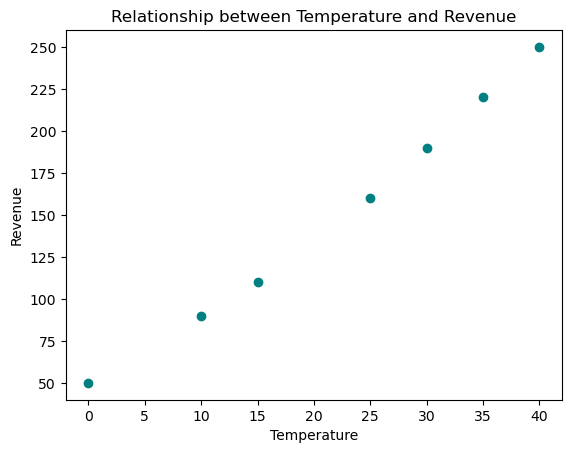

In [31]:
plt.scatter(X_train, Y_train, color = "teal")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Relationship between Temperature and Revenue")
plt.show()

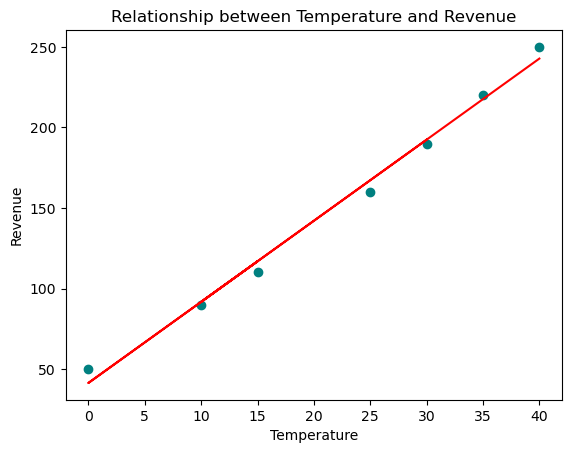

In [33]:
plt.scatter(X_train, Y_train, color = "teal")
plt.plot(X_train, Y_train_pred, color="red")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.title("Relationship between Temperature and Revenue")
plt.show()

### 8.Evaluate the Model

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
MAE = mean_absolute_error(Y_train, Y_train_pred)
print("Mean Absolute Error:", MAE)

MSE = mean_squared_error(Y_train,Y_train_pred)
print("Mean Square Error:", MSE)

print("Root Mean Square error:",np.sqrt(MSE))
r2=r2_score(Y_train,Y_train_pred)
print("r2 Error:",r2)

Mean Absolute Error: 5.221674876847284
Mean Square Error: 34.48275862068965
Root Mean Square error: 5.872202195147034
r2 Error: 0.9923957913032683


### 9.visualize Test

In [37]:
Y_test_pred=regressor.predict(X_test)

In [38]:
Y_test_pred.shape,Y_test.shape

((2,), (2,))

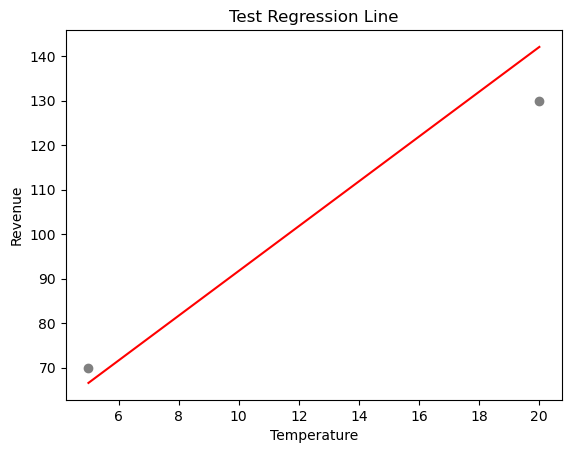

In [39]:
plt.scatter(X_test, Y_test,color="gray")
plt.plot(X_test,Y_test_pred,color='red')
plt.title("Test Regression Line")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

### 10.Test Evaluation matrix

In [40]:
MAE = mean_absolute_error(Y_test, Y_test_pred)
print("Mean Absolute Error:", MAE)

MSE = mean_squared_error(Y_test,Y_test_pred)
print("Mean Square Error:", MSE)

print("Root Mean Square error:",np.sqrt(MSE))
r2=r2_score(Y_test,Y_test_pred)
print("r2 Error:",r2)

Mean Absolute Error: 7.758620689655189
Mean Square Error: 78.77526753864447
Root Mean Square error: 8.875543224988794
r2 Error: 0.9124719249570616
